# Центральная предельная теорема

## Задание

Независимые с.в. $ \xi_i \sim exp(1), S_n = \sum \limits_{i=1}^{n} \xi_i $ Построить графики плотностей $S_n, n = 1,2,\dotsc,10.$ Изобразить на одном графике плотность центрированной и нормированной с.в. $S_n$ и плотность $N(0, 1)$
для $n = 1, 2, \dotsc , 20$. Также изобразить графики ф.р.

## Решение

Подключим необходимые библиотеки.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import scipy.integrate as integrate
from matplotlib.patches import Rectangle
import scipy.special as sp
import matplotlib.patches as patches

%matplotlib inline

Из курса теории вероятностей известно, что сумма [экспоненциально распределеных](https://ru.wikipedia.org/wiki/Экспоненциальное_распределение) с.в. дает  [гамма распределение](https://ru.wikipedia.org/wiki/Гамма-распределение). $$ Y = \sum\limits_{i=1}^k X_i \sim \Gamma(k,1/\lambda ) $$
Построим соответствующие графики плотностей.

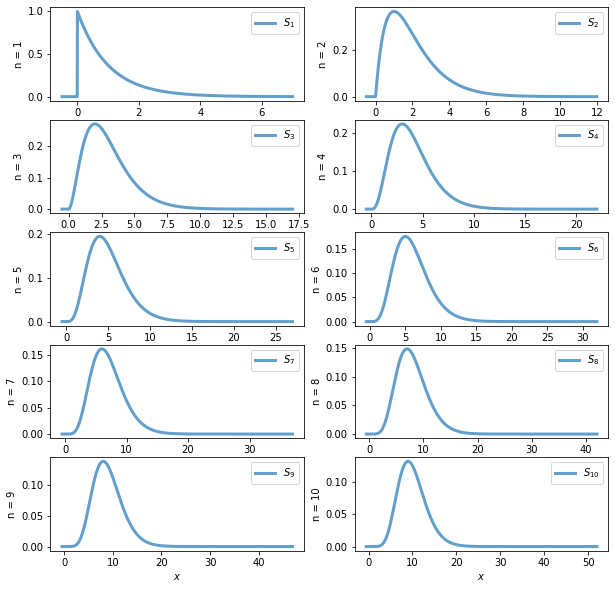

In [3]:
plt.figure(figsize=(10, 10))
for i in range(1, 11):
    x = np.linspace(-0.5, 2 + 5 * i, 1000)
    plt.subplot(5, 2, i)
    gamma_rv = sts.gamma(a=i)
    pdf = gamma_rv.pdf(x)
    name = "$" + "S_{" + str(i) + "}$"
    plt.plot(x, pdf, label=name, lw=3, alpha=0.7)
    plt.ylabel("n = {}".format(i))
    plt.xlabel("$x$")
    plt.legend(loc="best")
plt.show()

Так как плотность с.в. при преобразовании $Y = aX+b$ изменяетя по закону: 
$$p_Y(x) = \frac{p_X(\frac{x-a}{b})}{|b|}$$
Тогда при преобразовании: $$Z = \frac{Y-\textbf{E}Y}{\sqrt{DY}}$$
Получаем, что плотность $$p_Z(x) = p_Y\left(\left(x+\frac{\textbf{E}Y}{\sqrt{DY}}\right)\sqrt{DY}\right)\sqrt{DY}$$
В нашем случае $DY=n, \textbf{E}Y=n$ 

Итого $$p_Z(x) = p_Y(\sqrt{n}x-n)\sqrt{n} $$

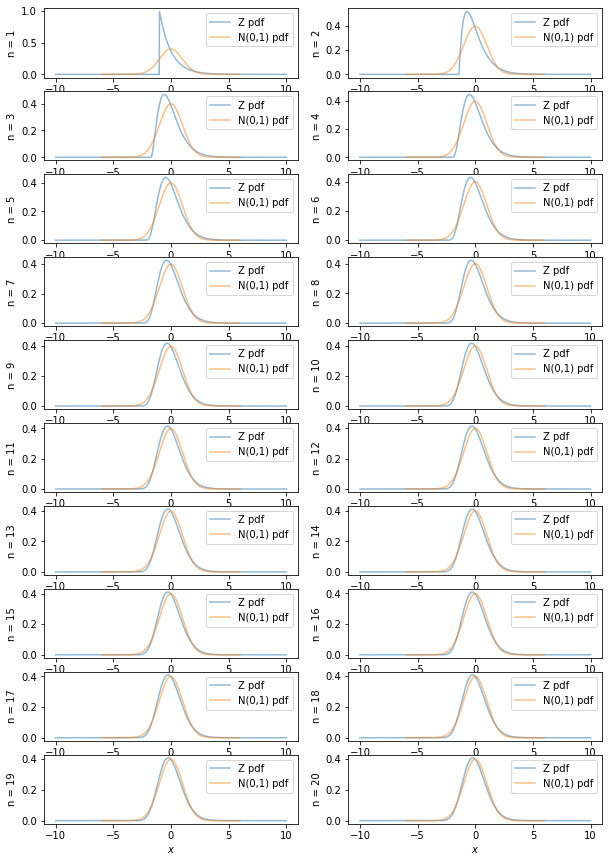

In [4]:
plt.figure(figsize=(10, 15))
for j in range(1, 21):
    x = np.linspace(-10, 10, 1000)
    plt.subplot(10, 2, j)
    gamma_rv = sts.gamma(a=j)
    pdf = gamma_rv.pdf((x + j**0.5) * j**0.5) * j**0.5
    plt.plot(x, pdf, label="Z pdf", alpha=0.5)
    x = np.linspace(-6, 6, 1000)
    norm_rv = sts.norm(0, 1)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label="N(0,1) pdf", alpha=0.5)
    plt.legend()
    plt.ylabel("n = {}".format(j))
    plt.xlabel("$x$")
plt.show()

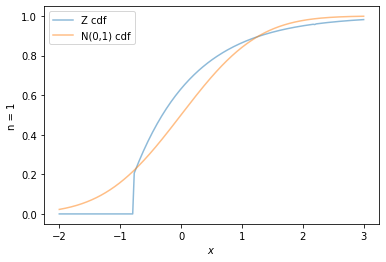

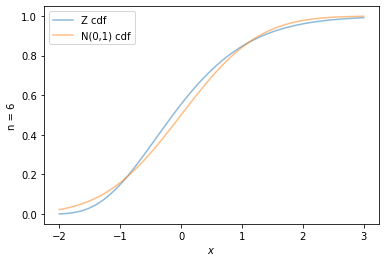

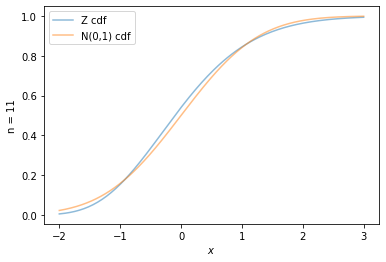

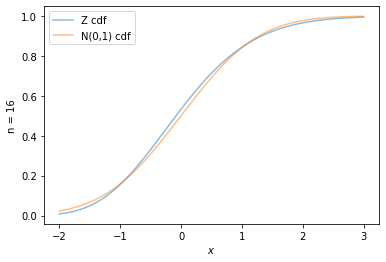

In [5]:
def integral(t, j):
    gamma_rv = sts.gamma(a=j)
    return integrate.quad(
        lambda x: gamma_rv.pdf((x + j**0.5) * j**0.5) * j**0.5, -100, t
    )[0]


integral_np = np.vectorize(integral)
for j in range(1, 17, 5):
    x = np.linspace(-2, 3, 200)
    y = integral_np(x, j)
    plt.plot(x, y, label="Z cdf", alpha=0.5)
    x = np.linspace(-2, 3, 1000)
    norm_rv = sts.norm(0, 1)
    cdf = norm_rv.cdf(x)
    plt.plot(x, cdf, label="N(0,1) cdf", alpha=0.5)
    plt.legend()
    plt.ylabel("n = {}".format(j))
    plt.xlabel("$x$")
    plt.show()

## Задание

С. в. $ \xi_i $ независимы и имеют плотность$ (e^{-(x-1)}I\{x > 1 \} + e^{-(x)}I\{x > 0 \})/2, S_n = \sum \limits_{i=1}^n \xi_i. $ Найти формулу для плотности распределения с.в. $S_n$.


1) Построить графики плотности для $n = 1, 2, . . . , 10 $ на одном графике.


2) Построить графики плотности центрированной и нормированной суммы и стандартного нормального
распределения (2 плотности на одном графике) для $n = 1, 2, . . . , 10$.

## Решение

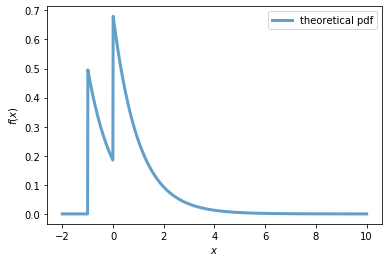

In [5]:
x = np.linspace(-2, 10, 1000)
pdf = (sts.expon(loc=-1).pdf(x) + sts.expon().pdf(x)) / 2
plt.plot(x, pdf, label="theoretical pdf", lw=3, alpha=0.7)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.legend(loc="best")
plt.show()

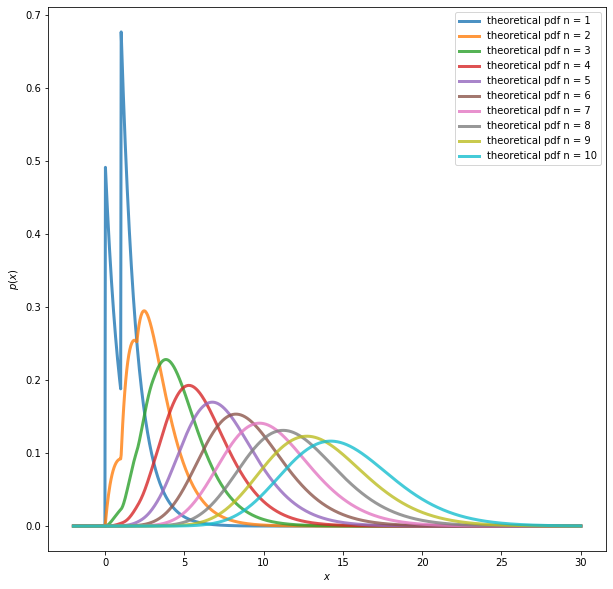

In [6]:
plt.figure(figsize=(10, 10))
for n in range(1, 11):
    x = np.linspace(-2, 30, 1000)
    pdf = np.zeros(1000)
    for k in range(n + 1):
        pdf += sp.comb(n, k) * (1 / 2) ** n * sts.gamma(n, loc=n - k).pdf(x)
    plt.plot(x, pdf, label="theoretical pdf n = {}".format(n), lw=3, alpha=0.8)
    plt.ylabel("$p(x)$")
    plt.xlabel("$x$")
    plt.legend(loc="best")
plt.show()

Посчитаем математическое ожидание суммы:
$ E\sum\limits_{i=1}^{n}Z_i = \sum\limits_{i=1}^{n}EZ_i = nEZ_1 = \frac{n}{2}(EX_1+EX_2) = \frac{3n}{2} $ 

Дисперсию: $ D\sum\limits_{i=1}^{n}Z_i = \sum\limits_{i=1}^{n}DZ_i = nDZ_1=n(EZ_1^2-(EZ_1)^2)=n(\frac{(EX_1^2+EX_2^2)}{2}-\frac{9}{4})=
n(\frac{2+2+2+1}{2} - \frac{9}{4})=\frac{5n}{4} $

1


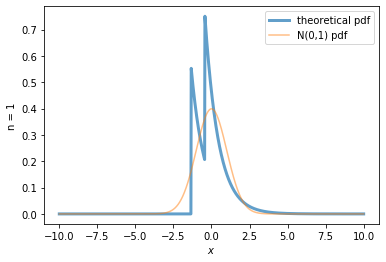

2


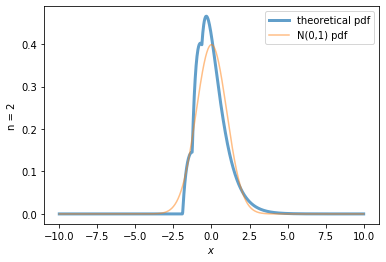

3


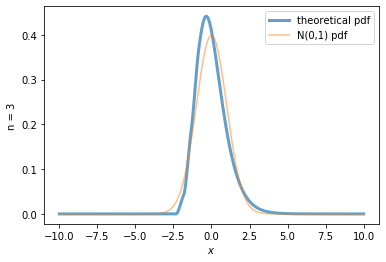

4


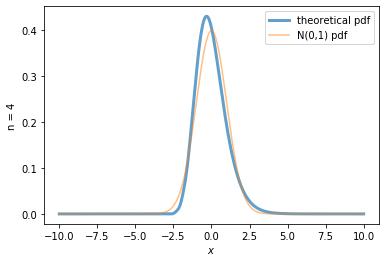

5


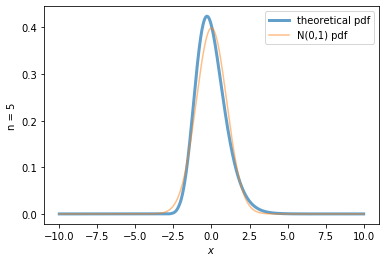

6


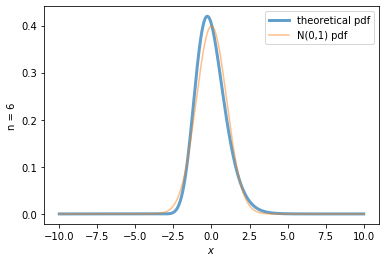

7


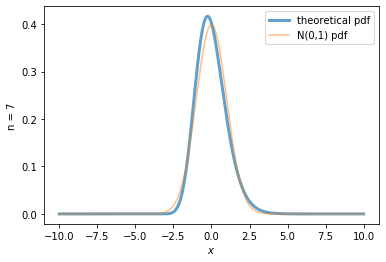

8


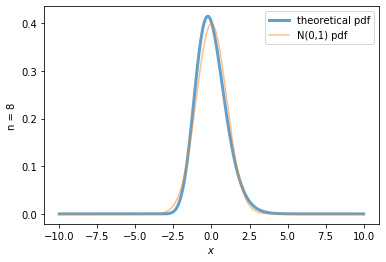

9


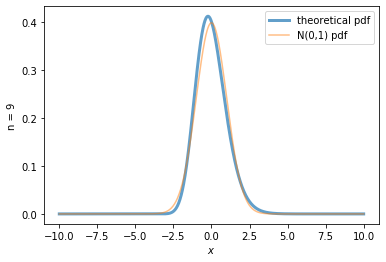

10


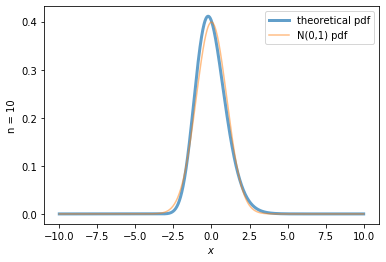

In [7]:
for n in range(1, 11):
    print(n)
    x = np.linspace(-10, 10, 1000)
    pdf = np.zeros(1000)
    EX = 3 * n / 2
    DX = 5 * n / 4
    for k in range(n + 1):
        pdf += (
            sp.comb(n, k)
            * (1 / 2) ** n
            * sts.gamma(n, loc=n - k).pdf((x + (EX / (DX**0.5))) * (DX**0.5))
            * DX**0.5
        )
    plt.plot(x, pdf, label="theoretical pdf", lw=3, alpha=0.7)
    cdf = norm_rv.pdf(x)
    plt.plot(x, cdf, label="N(0,1) pdf", alpha=0.5)
    plt.ylabel("n = {}".format(n))
    plt.xlabel("$x$")
    plt.legend(loc="best")
    plt.show()

## Задание

Распределение случайной величины $\xi$ является смесью двух нормальных распределений: $N (a, b)$ с
весом $1/3$ и $N (c, d)$ с весом $2/3$. Найти формулу для плотности распределения суммы $n$ независимых
реализаций случайной величины $\xi$.

1) Построить графики плотности для $n = 1, 2, . . . , 10$. По графикам найти числа локальных максимумов
плотности для каждого из $10$ значений $n$. Параметры $a, b, c, d$ выбрать так, чтобы плотность $\xi$ имела два выраженных локальных максимума.

2) Построить графики плотности центрированной и нормированной суммы и стандартного нормального
распределения (2 плотности на одном графике) для $n = 1, 2, . . . , 10.$

## Решение

Построим подходящие распределения взяв $a = 0, b = 1, c = 10, d = 3$

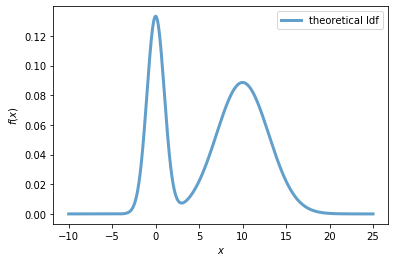

In [8]:
# Построим просто кси
norm1_rv = sts.norm(0, 1)
norm2_rv = sts.norm(10, 3)
x = np.linspace(-10, 25, 1000)
pdf = norm1_rv.pdf(x) / 3 + 2 * norm2_rv.pdf(x) / 3
plt.plot(x, pdf, label="theoretical ldf", lw=3, alpha=0.7)
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.legend(loc="best")
plt.show()

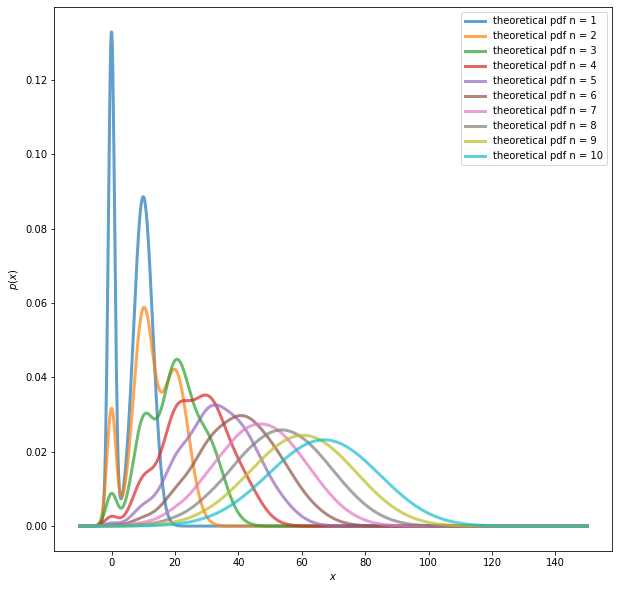

In [9]:
plt.figure(figsize=(10, 10))
for n in range(1, 11):
    x = np.linspace(-10, 150, 1000)
    pdf = np.zeros(1000)
    for k in range(n + 1):
        pdf += (
            sp.comb(n, k)
            * (1 / 3) ** k
            * (2 / 3) ** (n - k)
            * sts.norm(10 * (n - k), (k + 9 * (n - k)) ** 0.5).pdf(x)
        )
    plt.plot(x, pdf, label="theoretical pdf n = {}".format(n), lw=3, alpha=0.7)
    plt.ylabel("$p(x)$")
    plt.xlabel("$x$")
    plt.legend(loc="best")
plt.show()

Посчитаем математическое ожидание суммы:
$ E\sum\limits_{i=1}^{n}Z_i = \sum\limits_{i=1}^{n}EZ_i = nEZ_1 = n(\frac{EX_1}{3}+\frac{2EX_2}{3}) = \frac{20n}{3} $ 

Дисперсию: $ D\sum\limits_{i=1}^{n}Z_i = \sum\limits_{i=1}^{n}DZ_i = nDZ_1=n(EZ_1^2-(EZ_1)^2)=n(\frac{EX_1^2}{3}+\frac{2EX_2^2}{3}-\frac{400}{9})=
n(\frac{1}{3}+\frac{2*109}{3}-\frac{400}{9})=\frac{257n}{9} $

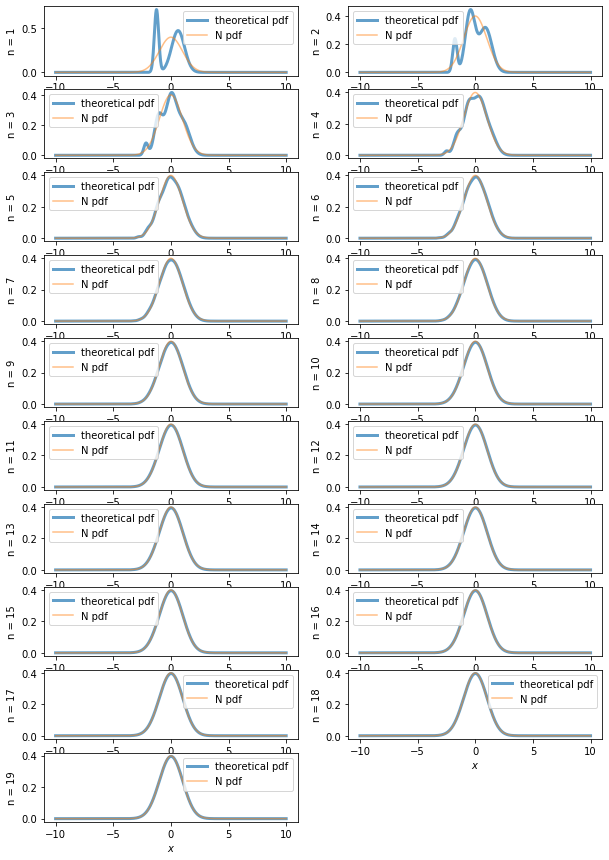

In [8]:
plt.figure(figsize=(10, 15))
for n in range(1, 20):
    x = np.linspace(-10, 10, 1000)
    plt.subplot(10, 2, n)
    pdf = np.zeros(1000)
    EX = 20 * n / 3
    DX = 257 * n / 9
    for k in range(n + 1):
        pdf += (
            sp.comb(n, k)
            * (1 / 3) ** k
            * (2 / 3) ** (n - k)
            * sts.norm(10 * (n - k), (k + 9 * (n - k)) ** 0.5).pdf(
                (x + (EX / (DX**0.5))) * (DX**0.5)
            )
            * DX**0.5
        )
    plt.plot(x, pdf, label="theoretical pdf", lw=3, alpha=0.7)
    pdf = norm_rv.pdf(x)
    plt.plot(x, pdf, label="N pdf", alpha=0.5)
    plt.ylabel("n = {}".format(n))
    plt.xlabel("$x$")
    plt.legend(loc="best")
plt.show()